In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read csv, removing initial spaces in entries ('  x' becomes 'x')
data = pd.read_csv("./dataset/data.csv",skipinitialspace = True)
data.head()

C:\Users\Sydney\AppData\Local\Temp\ipykernel_28024\2446780484.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./dataset/data.csv",skipinitialspace = True)


,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,ad
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [3]:
data.shape

(3279, 1559)

In [4]:
data.describe()

,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,url*peace+images,url*blipverts,url*tkaine+kats,url*labyrinth,...,caption*of,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,0.003355,0.004880,0.009149,0.004575,...,0.006099,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525
std,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,0.057831,0.069694,0.095227,0.067491,...,0.077872,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#df = data
#df = df[df.height != '   ?']
#df = df[df.width != '   ?']
#df = df[df.local != '   ?']
#df = df[df.local != '?']

def dropMissingToken(dataframe, missingToken, cols):
    '''
    Returns a dataframe that drops all instances of missingToken from columns cols in dataframe
    '''
    df = dataframe
    df.dropna()
    
    # strip whitespaces from each entry, then drop missingToken from column
    for col in cols:
        df[col].str.strip()
        df = df[df[col] != missingToken]
    
    return df

In [6]:
# drop all ? entries from height, width, local columns
cols = ['height','width','local','aratio']
df = dropMissingToken(data, '?', cols)

In [7]:
df.ad.unique()

array(['ad.', 'nonad.'], dtype=object)

In [8]:
df[df.ad == 'ad.']

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,ad
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
455,50,150,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
456,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
457,40,400,10.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [9]:
df['is_ad'] = df.ad == 'ad.'

In [10]:
df = df.drop(columns = 'ad')

In [11]:
df = df.apply(pd.to_numeric)

In [12]:
pair = df[['height', 'width', 'aratio', 'is_ad']]
hist = df[['aratio', 'is_ad']]

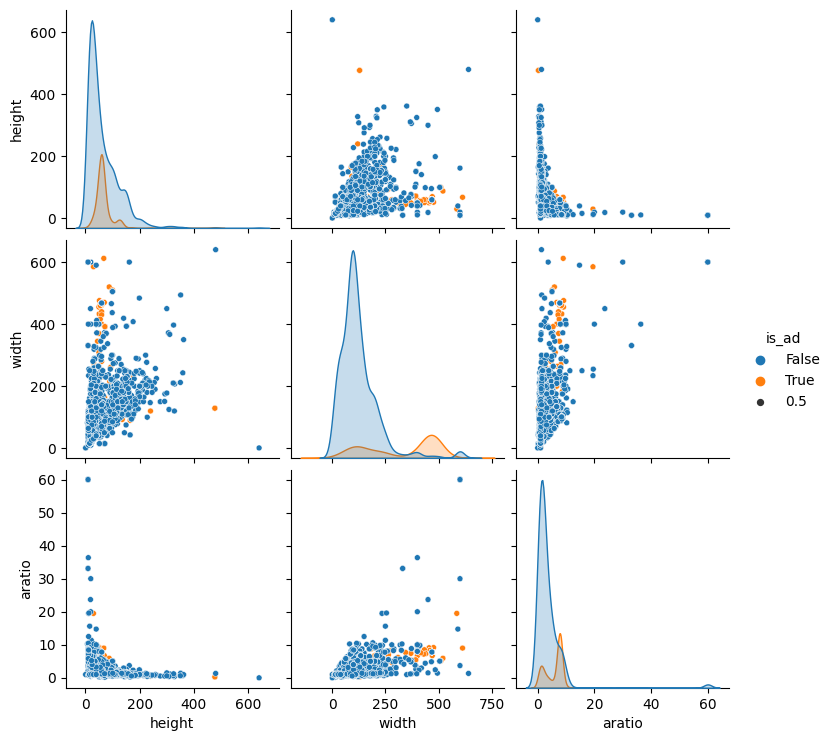

In [13]:
sns.pairplot(pair, hue='is_ad', plot_kws=dict(size=0.5))

In [14]:
data.isnull().any(axis=0)

height                False
width                 False
aratio                False
local                 False
url*images+buttons    False
                      ...  
caption*here          False
caption*click         False
caption*for           False
caption*you           False
ad                    False
Length: 1559, dtype: bool

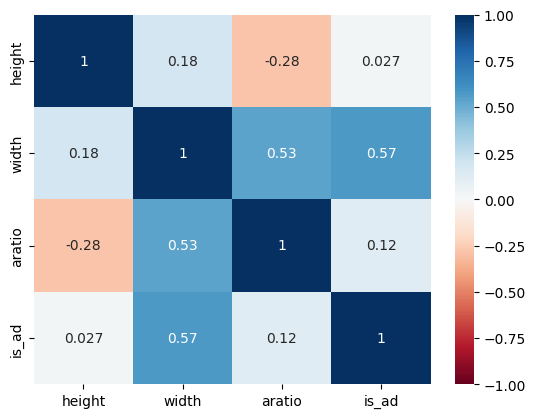

In [15]:
heatmap_df = df[['height','width','aratio','is_ad']]

corr = heatmap_df.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()